<a href="https://colab.research.google.com/github/syedsauda/CE888/blob/master/Assignment1/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kagle downloading datasets

Importing Libraries and setting up environment

In [0]:
pip install scikit-plot

In [0]:
import os
import pandas as pd
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

os.environ['KAGGLE_USERNAME'] = "syedsaud" # username from the json file
os.environ['KAGGLE_KEY'] = "94b7de5f3cf3cb489eb1ec0d36f07ab6" # key from the json file



---


Downloading First Dataset and Renaming files

---



In [0]:
!kaggle competitions download -c santander-customer-transaction-prediction #Download DATASET 1
!rm sample_submission.csv.zip
!rename 's/test.csv.zip/data1_test.csv.zip/' test.csv.zip
!rename 's/train.csv.zip/data1_train.csv.zip/' train.csv.zip
!ls

data1_test.csv.zip  data1_train.csv.zip  sample_data




---


Downloading Second Dataset and Renaming files

---



In [0]:
!kaggle competitions download -c microsoft-malware-prediction #DATASET 2
!rm sample_submission.csv.zip
!rename 's/test.csv.zip/data2_test.csv.zip/' test.csv.zip
!rename 's/train.csv.zip/data2_train.csv.zip/' train.csv.zip
!ls

#Loading datasets into pandas and Inspecting the Data

---
##First Dataset


---



In [0]:
df_train = pd.read_csv('data1_train.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
df_test = pd.read_csv('data1_test.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
print(df_train)
print(df_test)

             ID_code  target    var_0  ...  var_197  var_198  var_199
0            train_0       0   8.9255  ...   8.5635  12.7803  -1.0914
1            train_1       0  11.5006  ...   8.7889  18.3560   1.9518
2            train_2       0   8.6093  ...   8.2675  14.7222   0.3965
3            train_3       0  11.0604  ...  10.2922  17.9697  -8.9996
4            train_4       0   9.8369  ...   9.5031  17.9974  -8.8104
...              ...     ...      ...  ...      ...      ...      ...
199995  train_199995       0  11.4880  ...   8.5326  16.6660 -17.8661
199996  train_199996       0   4.9149  ...   6.7419  15.9054   0.3388
199997  train_199997       0  11.2232  ...   8.7155  13.8329   4.1995
199998  train_199998       0   9.7148  ...  10.0342  15.5289 -13.9001
199999  train_199999       0  10.8762  ...   8.1857  12.1284   0.1385

[200000 rows x 202 columns]
            ID_code    var_0    var_1  ...  var_197  var_198  var_199
0            test_0  11.0656   7.7798  ...  10.7200  15.4722 

###Inspecting Dataset1 for Covariate Shift

---
Removing ID_code and target columns and adding is_test column

---

In [0]:
df_train.drop(columns=['ID_code','target'], inplace=True)
df_test.drop(columns=['ID_code'], inplace=True)
df_train['is_test'] = 0
df_test['is_test'] = 1

---
Using Random Forest Classfier on randomised test and train set. Plotting ROC curve to see if there is covariate shift in data.

---

In [0]:
df = pd.concat([df_train, df_test], axis = 0)
X = df.drop(columns=['is_test'])
y = df['is_test']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
print('train2 shape:', X_train.shape, 'test2 shape:', X_test.shape)

train2 shape: (280000, 200) test2 shape: (120000, 200)


In [0]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_test_score = rfc.predict_proba(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


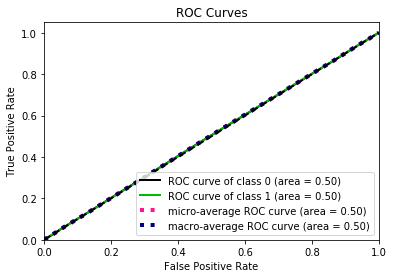

In [22]:
skplt.metrics.plot_roc_curve(y_test, y_test_score)
plt.show()

In [23]:
print('AUC score: ', round(roc_auc_score(y_true=y_test, y_score=y_test_score[:,1]), 4))

AUC score:  0.5025


---
Plotting Histogram of a feature in both training and testing data

---

Histogram of dataset on ' var_0 '


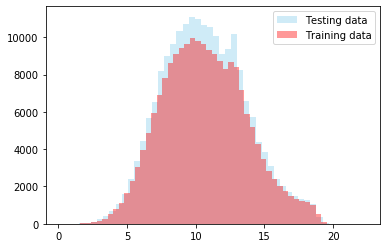

In [0]:
feature = "var_0"
print("Histogram of dataset on '",feature,"'")
histo = sns.distplot(df_test[[feature]].values.T[0], color="blue", kde=False, label="Testing data")
histo = sns.distplot(df_train[[feature]].values.T[0], color="red", kde=False, label="Training data")
legend = histo.legend()

# sns_plot = sns.distplot(y, kde=False, rug=True)

---
##Second Dataset


---



In [0]:
df_train = None
df_test = None
df_train = pd.read_csv('data2_train.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
df_test = pd.read_csv('data2_test.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
print(df_train)
print(df_test)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


                        MachineIdentifier  ... HasDetections
0        0000028988387b115f69f31a3bf04f09  ...             0
1        000007535c3f730efa9ea0b7ef1bd645  ...             0
2        000007905a28d863f6d0d597892cd692  ...             0
3        00000b11598a75ea8ba1beea8459149f  ...             1
4        000014a5f00daa18e76b81417eeb99fc  ...             1
...                                   ...  ...           ...
8921478  ffffedfe8fcc46e6d36ab39953589fee  ...             1
8921479  ffffef606490b2970873ec0a27ebd24b  ...             0
8921480  fffff8a40070d2d8379bb7fa2ed2fa66  ...             1
8921481  fffffbbaaf5969ae4b93e7f3f6d7132f  ...             1
8921482  ffffff75ba4f33d938ccfdb148b8ea16  ...             0

[8921483 rows x 83 columns]
                        MachineIdentifier  ... Wdft_RegionIdentifier
0        0000010489e3af074adeac69c53e555e  ...                   7.0
1        00000176ac758d54827acd545b6315a5  ...                  12.0
2        0000019dcefc128c2d4387c

###Inspecting Dataset2 for Covariate Shift

Histogram of dataset on ' Census_OSBuildNumber '


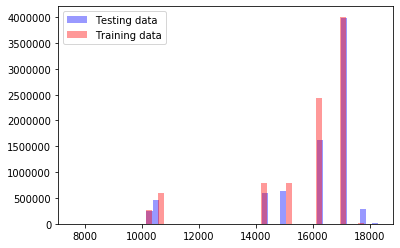

In [0]:
feature = "Census_OSBuildNumber"
print("Histogram of dataset on '",feature,"'")
histo = sns.distplot(df_test[[feature]].values.T[0], color="blue", kde=False, label="Testing data")
histo = sns.distplot(df_train[[feature]].values.T[0], color="red", kde=False, label="Training data")
legend = histo.legend()

Covariate shift in data is noticeable